**PREDICTIVE ANALYTICS: CLUSTERING ASSIGNMENT BY AINA FARINA**

**Main Objective:** 

Create a machine learning clustering analytics for customer segmentation.
<br> •	Understand the given problem and explore the data set, and do the necessary data pre-processing.
<br> •	Do exploratory data analysis to understand and visualize the data. 
<br>•	Work on various ML algorithms for clustering to select an ML model that performs best for the data at hand.
<br>•	Evaluate your results and find the best algorithm that segregates the customers.

> **1. Import Python Libraries**

In [1]:
##for data manipulation 
import pandas as pd
import numpy as np

##for Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler

##for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

> **2. Fetch Dataset**

In [2]:
df = pd.read_csv('C:/Users/farina/Documents/work/training/14. CADS/07. Advanced Analytics & Machine Learning/Assignment/Clustering/CustomerData.csv')
## check data
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


> **3. EDA & Feature Engineering**

In [3]:
## shape of dataset
df.shape

(8950, 18)

In [4]:
## datatype of column and basic info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
## summarize dataset statistical properties

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
##check for null data
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


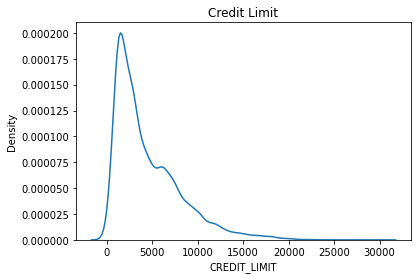

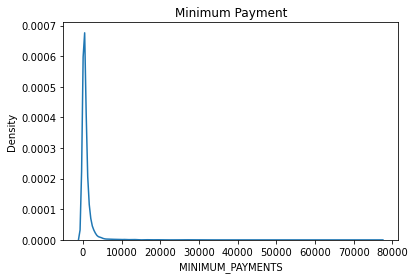

In [7]:
sns.kdeplot(x="CREDIT_LIMIT", data=df)
plt.title('Credit Limit')
plt.show()

sns.kdeplot(x="MINIMUM_PAYMENTS", data=df)
plt.title('Minimum Payment')
plt.show()

CREDIT_LIMIT has only 1 null value hence we can just drop it. 

In [8]:
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Based on the density graphs, we observe that MINIMUM_PAYMENTS is highly skewed to the right. Hence we replace null values with **median** of values

In [9]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [10]:
##check for null data
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [11]:
##dropping CUST_ID as it is not relevant
df1=df.drop(["CUST_ID"],axis=1)

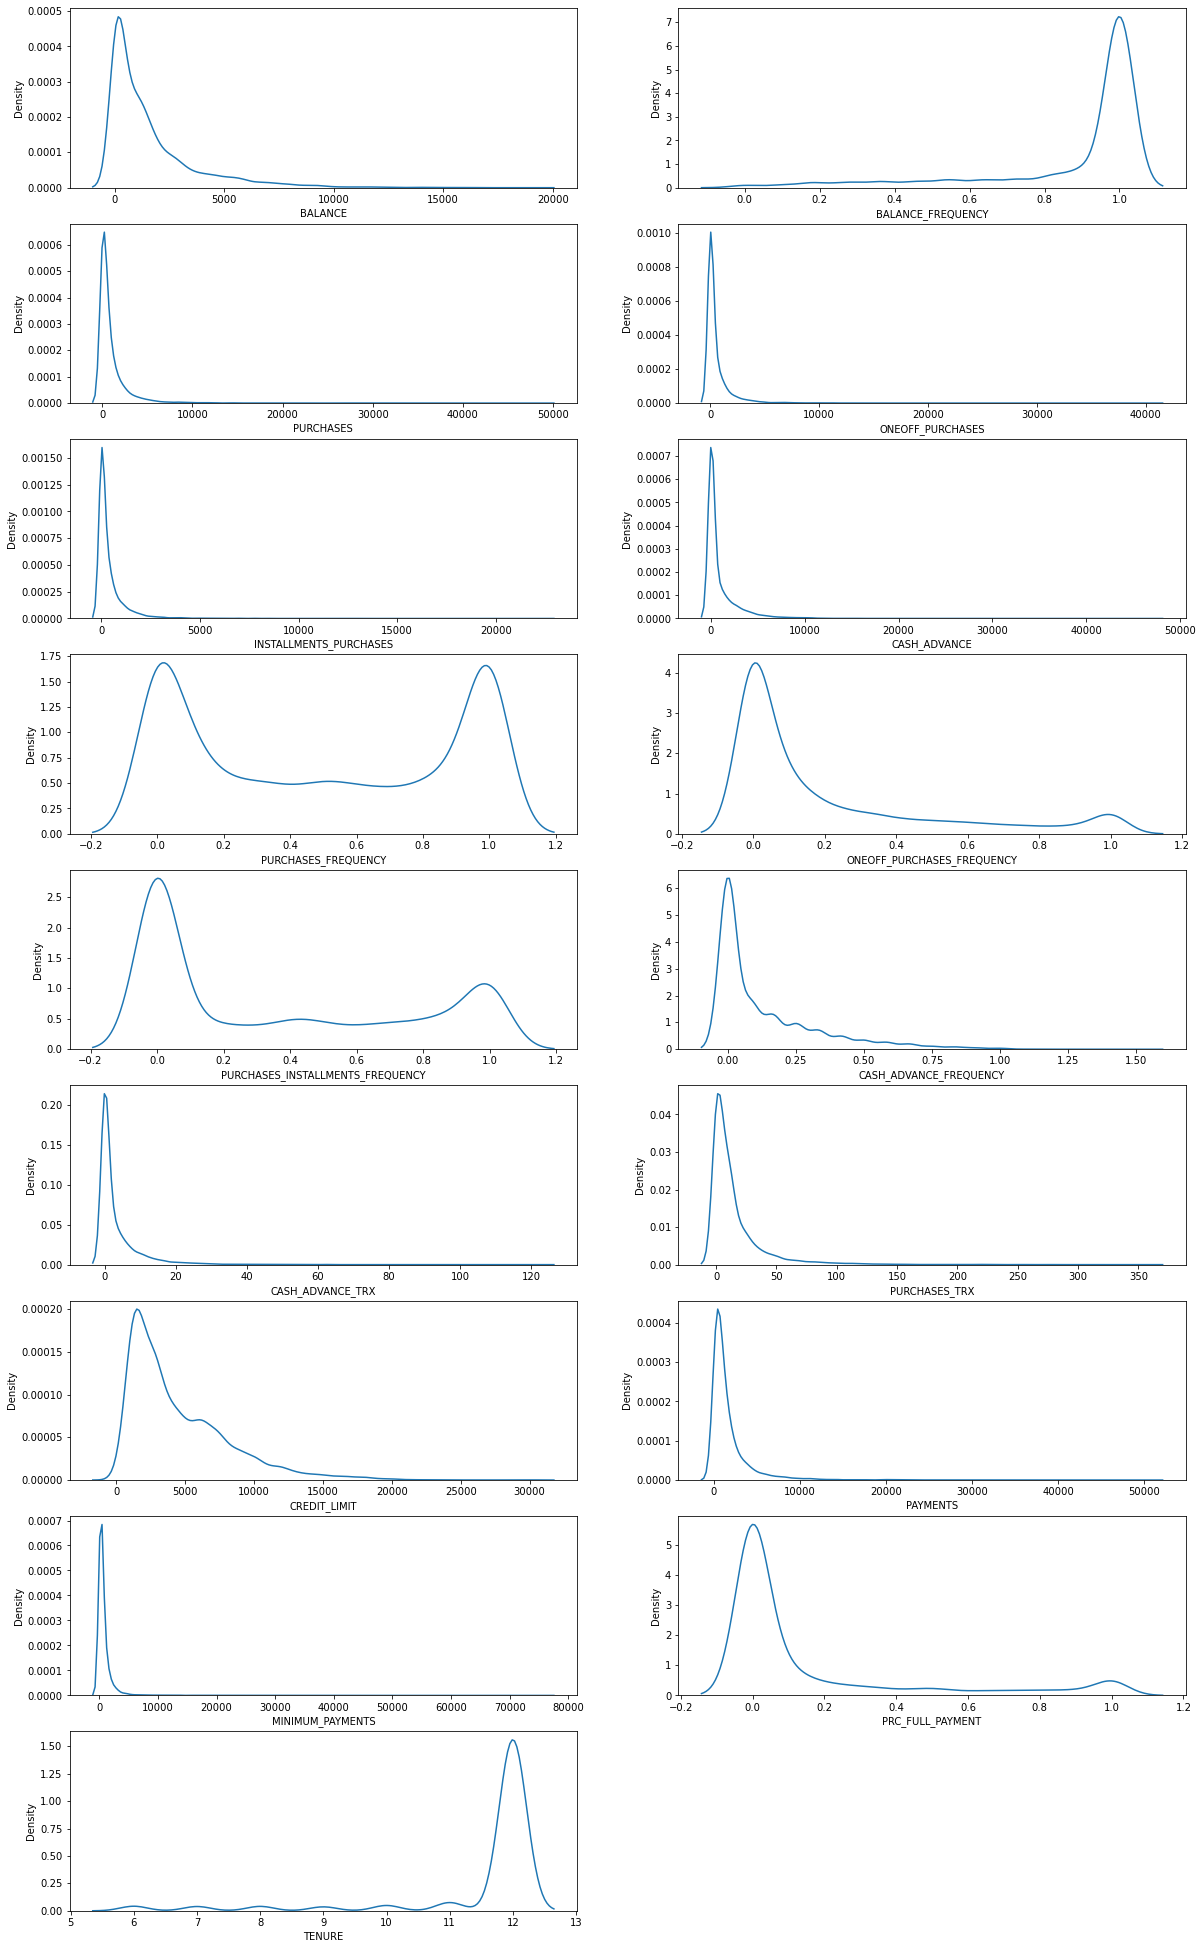

In [12]:
#now we have no null values, we need to visualise the features to understand the distibution of data
    
plt.figure(figsize=(20,35))
for i, col in enumerate(df1.columns):
    if df1[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df1[col], ax=ax)
        plt.xlabel(col)
        
plt.show()
              

Initial observations show that 14 of the features (BALANCE, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS,PRC_FULL_PAYMENT) are highly **skewed to the right.** 

Meanwhile, BALANCE_FREQUENCY and TENURE are highly **skewed to the left.**

To correct this, I will log the data to reduce the skewness

In [13]:
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT']

In [14]:
for col in cols:
    df1[col] = np.log(1 + df1[col])

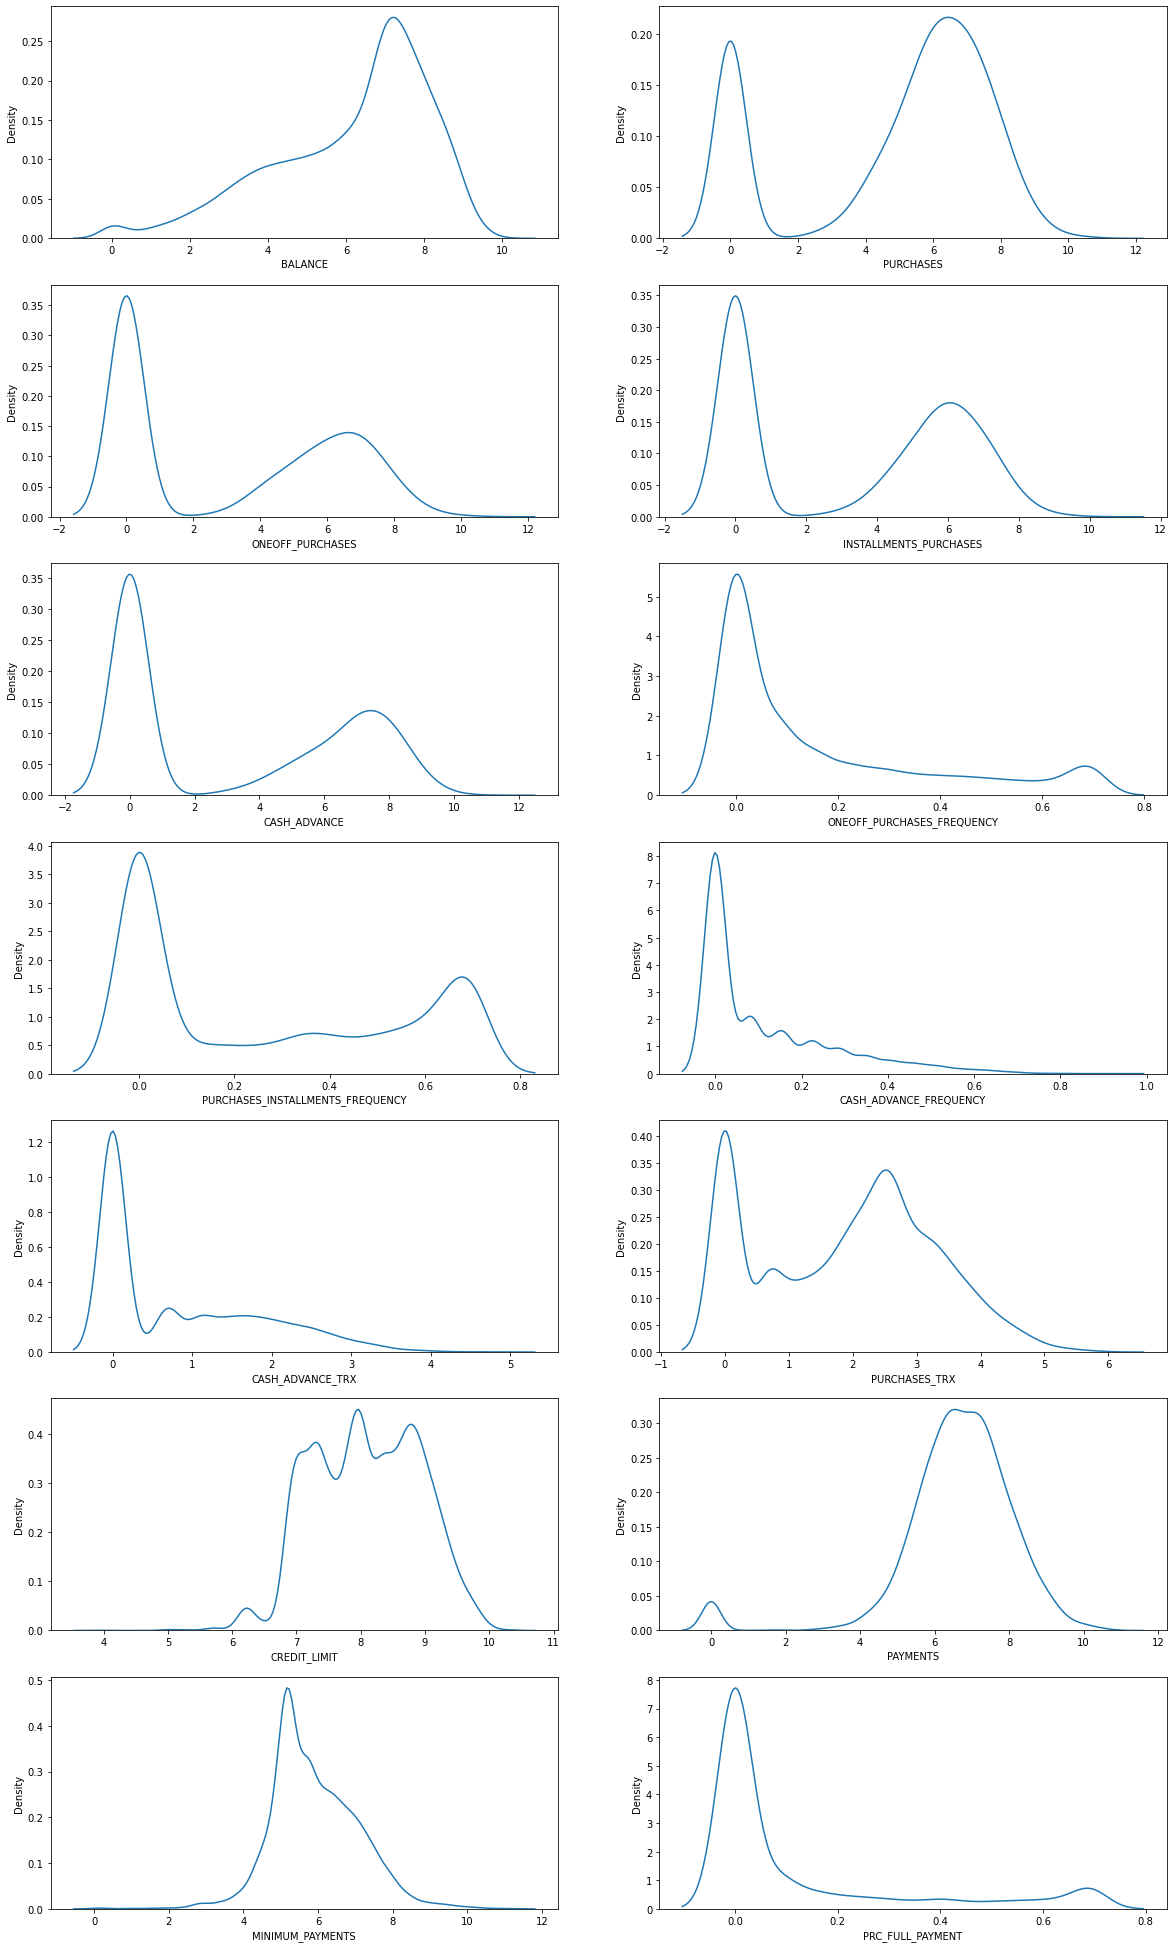

In [15]:
plt.figure(figsize=(20,35))
for i, col in enumerate(cols):
    ax = plt.subplot(7, 2, i+1)
    sns.kdeplot(df1[col], ax=ax)
plt.show()

The distribution of features are somewhat better now as they are less skewed.

**Correlation**

In [16]:
df1.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.652479,-0.075298,0.180294,-0.111140,0.521825,-0.094183,0.155393,-0.116655,0.471487,0.504196,-0.017427,0.299845,0.428830,0.762650,-0.423093,0.073221
BALANCE_FREQUENCY,0.652479,1.000000,0.096494,0.140200,0.112387,0.164776,0.229440,0.202549,0.167758,0.197591,0.193710,0.200618,0.095072,0.321647,0.418795,-0.096746,0.118566
PURCHASES,-0.075298,0.096494,1.000000,0.683469,0.685340,-0.496541,0.781709,0.574809,0.609426,-0.377206,-0.416757,0.888964,0.187703,0.206387,-0.051442,0.255453,0.105711
ONEOFF_PURCHASES,0.180294,0.140200,0.683469,1.000000,0.161334,-0.190100,0.373551,0.813927,0.097062,-0.128766,-0.144825,0.574333,0.284856,0.266852,0.058759,0.041726,0.091590
INSTALLMENTS_PURCHASES,-0.111140,0.112387,0.685340,0.161334,1.000000,-0.394285,0.794754,0.191309,0.905433,-0.310140,-0.335658,0.782650,0.106571,0.165181,-0.038714,0.281505,0.098993
CASH_ADVANCE,0.521825,0.164776,-0.496541,-0.190100,-0.394285,1.000000,-0.432580,-0.184670,-0.368478,0.814491,0.898421,-0.430743,0.119436,0.182760,0.407652,-0.325714,-0.100309
PURCHASES_FREQUENCY,-0.094183,0.229440,0.781709,0.373551,0.794754,-0.432580,1.000000,0.500061,0.866295,-0.332591,-0.367199,0.909009,0.112639,0.175713,-0.053020,0.312615,0.061006
ONEOFF_PURCHASES_FREQUENCY,0.155393,0.202549,0.574809,0.813927,0.191309,-0.184670,0.500061,1.000000,0.143295,-0.123237,-0.146006,0.621670,0.289817,0.273988,0.040354,0.142166,0.081301
PURCHASES_INSTALLMENTS_FREQUENCY,-0.116655,0.167758,0.609426,0.097062,0.905433,-0.368478,0.866295,0.143295,1.000000,-0.290836,-0.315244,0.769811,0.053064,0.129401,-0.039693,0.262997,0.071298
CASH_ADVANCE_FREQUENCY,0.471487,0.197591,-0.377206,-0.128766,-0.310140,0.814491,-0.332591,-0.123237,-0.290836,1.000000,0.936477,-0.327399,0.132118,0.193601,0.373961,-0.269960,-0.132359


<AxesSubplot:>

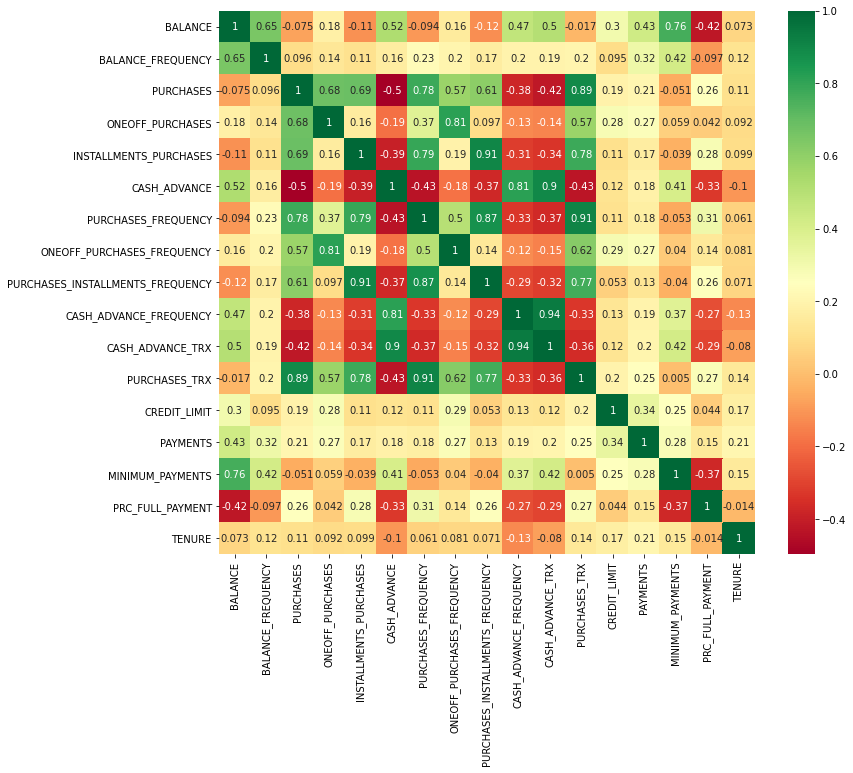

In [17]:
plt.figure(figsize=(12,10)) 
sns.heatmap(df1.corr(), annot=True, cmap ='RdYlGn')

Initial observations show that there are several features with relatively high correlation. 

> **4. Data Modelling**

First, I will use **PCA** to reduce the dimensionality of data so that it will be more managable. 

In [18]:
##fit data into PCA

pca = PCA()
pca.fit(df1)

PCA()

In [19]:
##to decide how many feature we'd like to keep based on cumulative variance plot
pca.explained_variance_ratio_

array([4.70569389e-01, 2.32666329e-01, 1.38192980e-01, 5.47322888e-02,
       3.36418983e-02, 2.67540671e-02, 1.65336587e-02, 9.64543219e-03,
       7.34398177e-03, 4.83009114e-03, 3.35905342e-03, 6.41176731e-04,
       4.59715333e-04, 3.00983469e-04, 2.28785829e-04, 5.19132766e-05,
       4.82563980e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

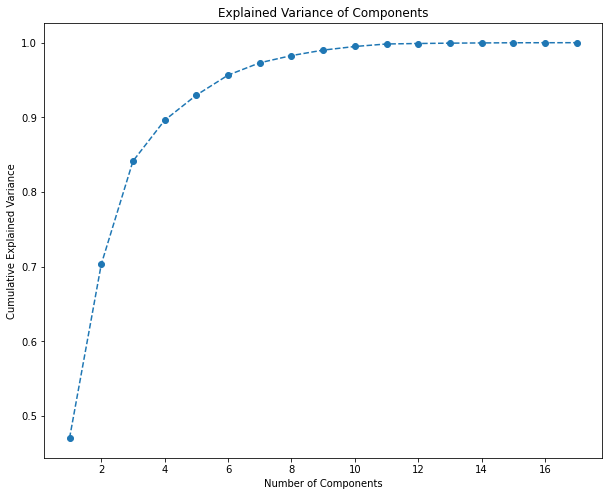

In [20]:
##visualise elbow plot

plt.figure(figsize=(10,8))
plt.plot(range(1,18), pca.explained_variance_ratio_.cumsum(), marker = "o", linestyle = "--")
plt.title('Explained Variance of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Rule of thumb is to pick the nummber of components that retain 70%-80% of variability. 
From the graph above, i will choose 5 components to retain 

In [21]:
pca = PCA(n_components = 4)

In [22]:
pca.fit(df1)

PCA(n_components=4)

In [23]:
pca.transform(df1)

array([[ 1.00964726, -5.59909991,  0.75975137,  0.10155957],
       [-8.94901023,  1.57164178,  1.00399439, -1.52242885],
       [ 2.6461922 ,  1.33527932, -4.95765706, -2.37591012],
       ...,
       [ 1.46422209, -6.12835474,  0.90794858,  3.16270195],
       [-5.88900991, -5.56569049, -2.30953089,  4.13733072],
       [ 0.33260834,  2.59137719, -4.28437471,  4.93369975]])

In [24]:
scores_pca = pca.transform(df1)

K Means Clustering with PCA

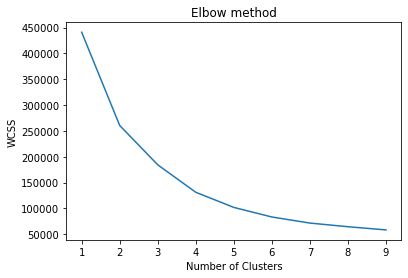

In [25]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(scores_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph above, initial observations show that elbow point is between 3-5. I will use silhouette score to determine which number is optimal

In [26]:
##to determine the best number of clusters, we use the silhoutte score

SK = range(2,10)
sil_score = []
for i in SK:
    labels= cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(scores_pca).labels_
    score = metrics.silhouette_score(scores_pca,labels,metric="euclidean",sample_size=1000,random_state=200)
    sil_score.append(score)
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(scores_pca,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.39635266715326495
Silhouette score for k(clusters) = 3 is 0.4211883632727967
Silhouette score for k(clusters) = 4 is 0.4561164690830065
Silhouette score for k(clusters) = 5 is 0.48583862706674047
Silhouette score for k(clusters) = 6 is 0.5039552393031063
Silhouette score for k(clusters) = 7 is 0.5186923870887131
Silhouette score for k(clusters) = 8 is 0.48388349978096307
Silhouette score for k(clusters) = 9 is 0.4158651988088937


From the above, 7 is the best number of clusters for this model

In [27]:
##n_clusters = 7

kmeans = KMeans(n_clusters=7, random_state=23)
kmeans.fit(scores_pca)

df['cluster_id'] = kmeans.labels_

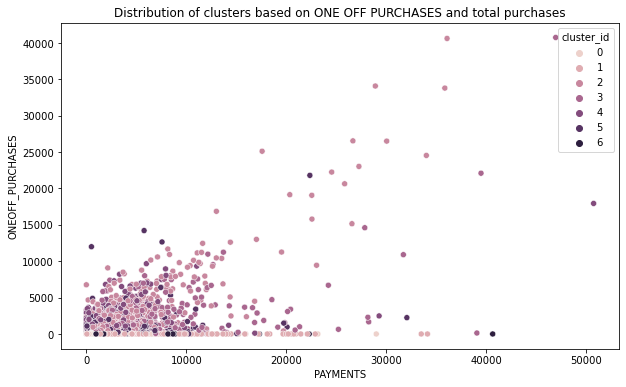

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PAYMENTS', y='ONEOFF_PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on ONE OFF PURCHASES and total purchases')
plt.show()

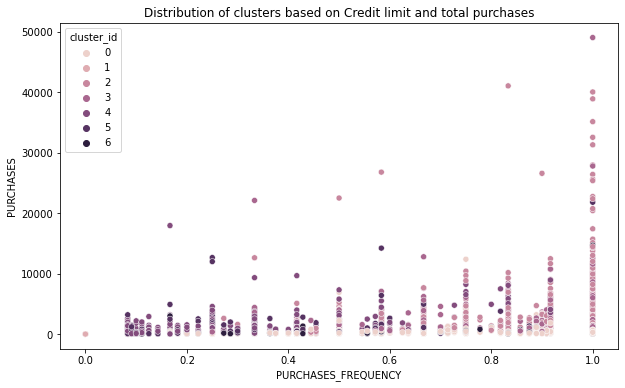

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

Though the silhouette scroe shows the best number of clusters is 7, out of curiosity, we will try n_cluster = 5. This is due to the fact that there is where i feel the elbow best fits. 

In [32]:
##n_clusters = 5

kmeans = KMeans(n_clusters= 5, random_state=23)
kmeans.fit(scores_pca)

df['cluster_id'] = kmeans.labels_

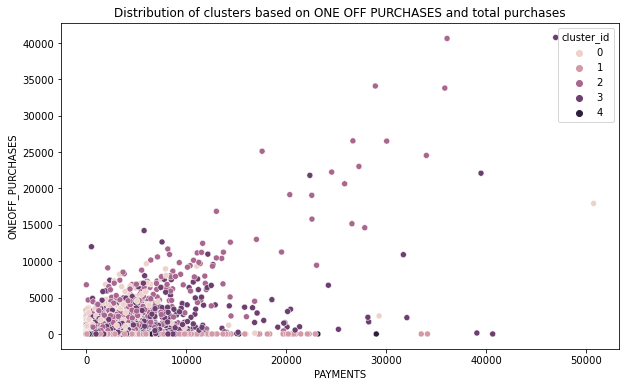

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PAYMENTS', y='ONEOFF_PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on ONE OFF PURCHASES and total purchases')
plt.show()

Depending on the business understanding of the company, the suitablity of cluster number will defer to the objective of the market segmentation (i.e. saving plans, loans, etc)